In [1]:
import GPflow
import numpy as np
from matplotlib import pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

/usr/local/lib/python2.7/dist-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


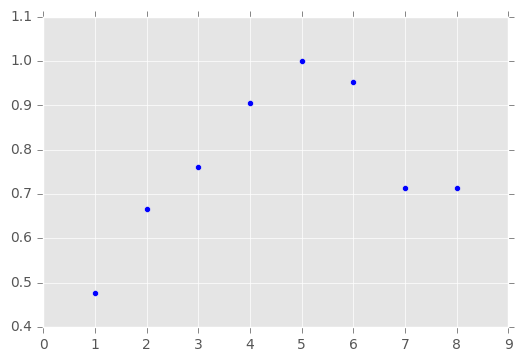

In [6]:
y=np.array([2.0e4, 2.8e4, 3.2e4, 3.8e4, 4.2e4, 4.0e4, 3.0e4, 3.0e4]).astype('f')
y0 = y/y.max()
x = np.arange(1,1+len(y)).astype('f')
plt.scatter(x,y0)

In [7]:
k = GPflow.kernels.PeriodicKernel(1, period=7.0)
m = GPflow.gpr.GPR(x[:,None], y0[:,None], kern=k)
m.likelihood.variance = 0.01

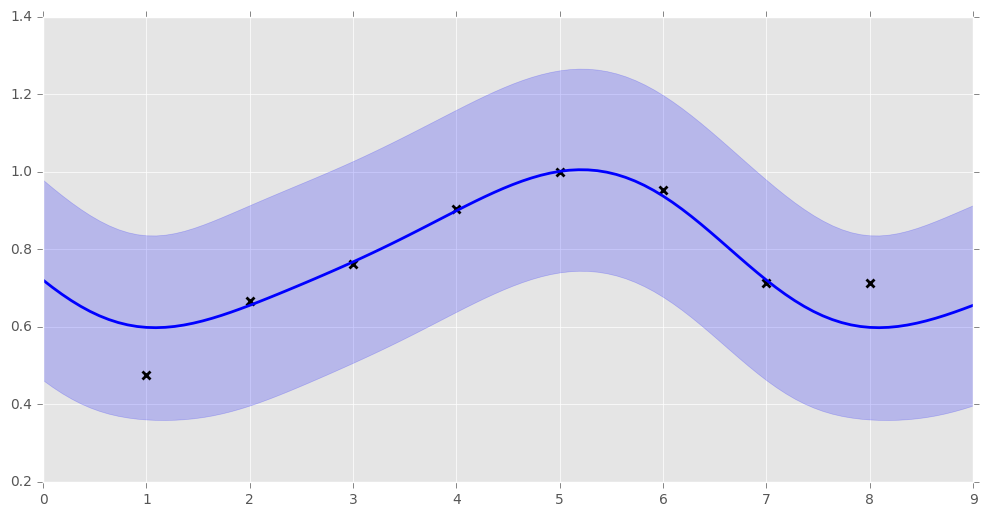

In [8]:
def plot(m):
    xx = np.linspace(x.min()-1, x.max()+1, 100)[:,None]
    mean, var = m.predict_y(xx)
    plt.figure(figsize=(12, 6))
    plt.plot(x, y0, 'kx', mew=2)
    plt.plot(xx, mean, 'b', lw=2)
    plt.fill_between(xx[:,0], mean[:,0] - 2*np.sqrt(var[:,0]), mean[:,0] + 2*np.sqrt(var[:,0]), color='blue', alpha=0.2)
plot(m)

In [9]:
k_daily = GPflow.kernels.PeriodicKernel(1, period=24.0)
k_weekly = GPflow.kernels.PeriodicKernel(1, period=24.0*7.0)
k_growth = GPflow.kernels.Linear(1)
k_total = k_daily+k_weekly+k_growth

In [10]:
k_total

Name,values,prior,constraint
unnamed.periodickernel_2.period,[ 168.],None,+ve
unnamed.periodickernel_2.lengthscales,[ 1.],None,+ve
unnamed.periodickernel_2.variance,[ 1.],None,+ve
unnamed.periodickernel_1.variance,[ 1.],None,+ve
unnamed.periodickernel_1.period,[ 24.],None,+ve
unnamed.periodickernel_1.lengthscales,[ 1.],None,+ve
unnamed.linear.variance,[ 1.],None,+ve
